# 1 File connection and reading the first lines

Open a connection to the file: Bolivian_squirrel_monkey_genes_mart_export.txt to read the data in the file. 

To learn what data is stored and how: Read and print the first ten lines from the file.

In [ ]:
bsm_file = open("Bolivian_squirrel_monkey_genes_mart_export.txt","r")

print(bsm_file.readline())
print(bsm_file.readline())
print(bsm_file.readline())
print(bsm_file.readline())
print(bsm_file.readline())
print(bsm_file.readline())
print(bsm_file.readline())
print(bsm_file.readline())
print(bsm_file.readline())
print(bsm_file.readline())

bsm_file.close()

print("---------------------------------------")
# or (less copy paste)

bsm_file = open("Bolivian_squirrel_monkey_genes_mart_export.txt","r")

for  i in range(0,11):
    print(bsm_file.readline())

bsm_file.close()

# 2 Getting data from a file in a list

Now we know that we have lines with data that represent the header starting with >
and the sequence (which can also be unavailable).

The header contains the gene ID the start and stop position and the chromosome at which the gene can be found.

The sequence can span multiple lines and when it does we need to stitch it together to obtain the complete sequence.

2.1) First try to get the data from the file in a list an dprint the first ten items in the list

In [ ]:
## open a connection to the file
bsm_file = open("Bolivian_squirrel_monkey_genes_mart_export.txt","r")

## make an empty list to store the data
bsm_genes = []

## use a loop to read all the data, line-by-line and add it to the empty list
for line in bsm_file:
    bsm_genes.append(line)  # you can also use: bsm_genes += [line]

bsm_file.close()

# print the first 10 items in the list
print(bsm_genes[0:10])

Now we have all data from the file available for Python to work with. However when we look at the frist ten items/lines we can notice some issues that are not convient.
- the line end special character \n is still at each line
- the header info is concatenated, we'd like the id, start, stop and chromosome separate
- the sequence is spread over multiple ietems/lines

Let's solve this one-by-one including checks if it worked

2.2) remove the end-of-line characters from the data going into the list, print the first ten items

2.3) split the header info and make separate list for id, start, stop and chromosome, print the first ten items and check the length of each list

2.4) concatenate the sequence-parts in to full sequences, print the first ten items and check the length of each list

In [ ]:
# 2.2) remove end-of-line characters

bsm_file = open("Bolivian_squirrel_monkey_genes_mart_export.txt","r")

bsm_genes = []
for line in bsm_file:
    bsm_genes.append(line.rstrip()) ## .rstrip() can be used to remove the \n character from the end of the line
    ## you can also use bsm_genes += [line.rstrip()]
bsm_file.close()

print(bsm_genes[0:10])

In [ ]:
# 2.3) split header and make separate list for id, start, stop and chromosome

bsm_file = open("Bolivian_squirrel_monkey_genes_mart_export.txt","r")

# we need to make a separate list for id, start, stop and chromosome and therefor also for the sequence
bsm_id = []
bsm_start = []
bsm_stop = []
bsm_chr = []
bsm_seq = []

for line in bsm_file:
    # first remove the \n
    line = line.rstrip()
    # check id the line contains a > chracter, this is the difference between header and sequence
    if line.count(">") > 0: # if there is more than 0 > itis a header as sequence lines do not have this character
        head_line = line.split("|") # split by straight dash
        bsm_id.append(head_line[0]) # add the id (entry 1, index 0) to the id list
        bsm_start.append(head_line[1]) # add the start (entry 2, index 1) to the start list 
        bsm_stop.append(head_line[2]) # add the end (entry 3, index 2) to the end list
        bsm_chr.append(head_line[3]) # add the chromosome (entry 4, index 3) to the chr list
    else:
        bsm_seq.append(line) # if the line is not a header, the whole line can be added to the sequence list

bsm_file.close()
        
print(bsm_id[0:10])
print(bsm_start[0:10])
print(bsm_stop[0:10])
print(bsm_chr[0:10])
print(bsm_seq[0:10])

[len(bsm_id),
len(bsm_start),
len(bsm_stop),
len(bsm_chr),
len(bsm_seq)]
        

In [ ]:
# 2.4 Concatenate (glue) the sequence lines together
# when we check the length we see that we have equal numbers of id, start, stop and chromosome entries.
# we have much more sequenc entries because of the multiple lines per sequence, when we glue them together this should be fine


bsm_file = open("Bolivian_squirrel_monkey_genes_mart_export.txt","r")

# we need to make a separate list for id, start, stop and chromosome and therefor also for the sequence
bsm_id = []
bsm_start = []
bsm_stop = []
bsm_chr = []
bsm_seq = []

for line in bsm_file:
    # first remove the \n
    line = line.rstrip()
    # check id the line contains a > chracter, this is the difference between header and sequence
    if line.count(">") > 0: # if there is more than 0 > it is a header as sequence lines do not have this character
        head_line = line.split("|") # split by straight dash
        bsm_id.append(head_line[0]) # add the id (entry 1, index 0) to the id list
        bsm_start.append(head_line[1]) # add the start (entry 2, index 1) to the start list 
        bsm_stop.append(head_line[2]) # add the end (entry 3, index 2) to the end list
        bsm_chr.append(head_line[3]) # add the chromosome (entry 4, index 3) to the chr list
    else:
##############################################################################################################################
## here we need to make sure we end up with one sequence per gene
        ## to know if a gene has a sequence entry already we can check the length of the id list and the chromosome list
        if len(bsm_seq) < len(bsm_id): 
            bsm_seq += [""] ## if the seq lenght is shorter we can add an empty item to the list
        
        bsm_seq[len(bsm_id)-1] += line # the we can concatenate the rest of the sequence to this item 
##############################################################################################################################
bsm_file.close()
        
print(bsm_id[0:10])
print(bsm_start[0:10])
print(bsm_stop[0:10])
print(bsm_chr[0:10])
print(bsm_seq[0:10])

[len(bsm_id),
len(bsm_start),
len(bsm_stop),
len(bsm_chr),
len(bsm_seq)]
        


# 3 Getting data from a file in a dictionary

Having the data in separate lists is great, but not ideal. The data has to be in the same order and there is no link between the entries. Also we hav multiple lists, whereas one container might be easier.

A Dictonary links the data entries and makes processing easier and mor reproducible.

3.1) Start by making an empty dictionary and with getting the data from the file line by line. The line of data is not stored directly in the dictionary, but processed first. Strip the line of the end of line character (\n) and store it in a new variable.

In [ ]:
# 3.1)

# Make empty dictionary
bsm_genes_dict = {}

# open file connection
bsm_file = open("Bolivian_squirrel_monkey_genes_mart_export.txt","r")

## loop over file line-by-line
for line in bsm_file:
    ## strip end-of-line and store in new variable
    tmp_line = line.rstrip() ## .rstrip() can be used to remove the \n character from the end of the line
## close file connection 
bsm_file.close()

print(bsm_genes_dict)


3.2) Copy the script from 3.1)

We need to process the data line per line befor we can enter it in a dictionary. Let's start with the header. A header can be recognised by the > character a the start of a line. 
Look up how we checked for a line containing a header using an if statement and counting ofr a certain character

The data stored in the header is the gene id, start, stop and chromosome.

The gene id will make an good dictionary key, the other data can be values (in a list) or in their own dictionary.

For example
{id:{"start":0,"stop":1,"chr":"1","seq":""}

Add an empty "seq" key as we need to get that info next itteration


In [1]:
# 3.2)

# Make empty dictionary
bsm_genes_dict = {}

# open file connection
bsm_file = open("Bolivian_squirrel_monkey_genes_mart_export.txt","r")

## loop over file line-by-line
for line in bsm_file:
    ## strip end-of-line and store in new variable
    tmp_line = line.rstrip() ## .rstrip() can be used to remove the \n character from the end of the line
    if tmp_line.count(">") > 0: # if there is more than 0 > it is a header as sequence lines do not have this character
        ## split the header line by straight dash
        head_line = line.split("|") # split by straight dash
        # get the data in a dictionary with the gene id as key
        bsm_genes_dict[head_line[0]] = {"start":head_line[1],"stop":head_line[2],"chr":head_line[3],"seq":""}
## close file connection 
bsm_file.close()

print(bsm_genes_dict)

{'>ENSSBOG00000000081': {'start': '7425054', 'stop': '7425155', 'chr': 'JH378199.1\n', 'seq': ''}, '>ENSSBOG00000000085': {'start': '12693361', 'stop': '12693501', 'chr': 'JH378135.1\n', 'seq': ''}, '>ENSSBOG00000000006': {'start': '2721', 'stop': '3675', 'chr': 'MT\n', 'seq': ''}, '>ENSSBOG00000000082': {'start': '2467656', 'stop': '2467954', 'chr': 'JH378291.1\n', 'seq': ''}, '>ENSSBOG00000000101': {'start': '4485691', 'stop': '4485799', 'chr': 'JH378217.1\n', 'seq': ''}, '>ENSSBOG00000000008': {'start': '3743', 'stop': '3814', 'chr': 'MT\n', 'seq': ''}, '>ENSSBOG00000000090': {'start': '7229695', 'stop': '7229801', 'chr': 'JH378143.1\n', 'seq': ''}, '>ENSSBOG00000000063': {'start': '190193', 'stop': '205643', 'chr': 'JH378262.1\n', 'seq': ''}, '>ENSSBOG00000000012': {'start': '5001', 'stop': '5068', 'chr': 'MT\n', 'seq': ''}, '>ENSSBOG00000000042': {'start': '364712', 'stop': '376648', 'chr': 'JH378271.1\n', 'seq': ''}, '>ENSSBOG00000000084': {'start': '16197093', 'stop': '16197198'

3.3) Now that we have our header information in a dictionary it is time to add the sequence info

Copy the script of 3.2, add an else statement  

In [2]:
# 3.3)

# Make empty dictionary
bsm_genes_dict = {}

# open file connection
bsm_file = open("Bolivian_squirrel_monkey_genes_mart_export.txt","r")

## loop over file line-by-line
for line in bsm_file:
    ## strip end-of-line and store in new variable
    tmp_line = line.rstrip() ## .rstrip() can be used to remove the \n character from the end of the line
    if tmp_line.count(">") > 0: # if there is more than 0 > it is a header as sequence lines do not have this character
        ## split the header line by straight dash
        head_line = tmp_line.split("|") # split by straight dash
        # get the data in a dictionary with the gene id as key
        bsm_genes_dict[head_line[0]] = {"start":head_line[1],"stop":head_line[2],"chr":head_line[3],"seq":""}
    ## add an else stament
    else:
        ## add sequence to "seq" key at the right gene id make sure you concatenate the sequences when they are one multiple lines
        bsm_genes_dict[head_line[0]]["seq"] += tmp_line
## close file connection 
bsm_file.close()

print(bsm_genes_dict[list(bsm_genes_dict.keys())[7]])

{'start': '190193', 'stop': '205643', 'chr': 'JH378262.1', 'seq': 'ATGTCCCAGCTGAGCCTGTCCTGGCTGGGCCTTGGGCCGGTGGCAGCGTCCCCGTGGCTGCTCCTGCTGCTGGTTGGGGTCTCCTGGCTGCTGGCCCGTGTCCTGGCCTGGACCTACAACTTCTATGACAACCGCCGCTGGCTCCAGTATTTCCCGGAGCCCCCAAAAGTGAACTGGTTTTGGGGACACCAGGGCCTGACCGCTCCCACGGAAGAGGGCGTGAAGAGGCTCATCCAGCTGGTGACCACCTATCCCCAGGGCTTTAAGTTGTGGCTGGGTCCCACCTTCCCCCTCCTCGTTTTATGCCACCCTGACACGGTCCGGGCTATCACCAGTGCCTCAGCTGCTGTCGCACCCAAGAATAAGGTTTTCTATGACTCCGTGAAGCCCTGGATGGGGGACGGGCTCCTGCTGAGTGCTGGTGACAAGTGGAGCCGCCACCGCCGCATGCTGACGCCCGCCTTCCACTTCAACATCCTCAAGCCCTATGTGGCGATTTTCAACAAGAGCGTGAACATCATGCACGACAAGTGGCAGCGCCTGGCCTCAGTGGGCACCACAAGACTAGACATGTTTGAGCACATCAGCCTCATGACCTTGGACACTCTGCAGAAATGTGTCTTCAGCTTTGATAGCAATTGTCAGGAGAAGCCCAGCGATTATATCGCCGCCACCTTGGAACTCAGTGCCTCTGTAGAAAAAAGAAACCAGCGCTTTCTCCTGCACTCGGACTTCCTGTATTATCTGACTCCGGATGGGCGGCGCTTCCGCAGGGCCTGCCGTCTGGTGCACGACTTCACAGACGCCGTCATCCAGGAGCGGCGCCGCGCCCTCCCCACTCAGGGTACTGATGACTTCTTCAAGGACAAGGCCAAGTCCAAGACTTTAGACTTCATTGATGTGCTTCTGCTGAGCAAGGATGAAGATGGGAGG

# 4 Exploring the data

Now that the data from the file is stored in lists and/or dictionary we can try to answer some questions

4.1) Howmany genes are on each chromosome? Plot the result in a histogram

4.2) Howmany 'Sequence unavilable' are in the dataset

4.3) Plot an histogram with the gene lengths. What is the median gene length for each chromosome?     

4.4) Plot a histogram with the gene coding lengths. What is the median coding length for each chromosome?

4.5) What is the codon usage for each chromosome?

4.6) Plot a histogram of a the usage of a codon as percentage of total basepairs for each gene.

4.7) Plot for one chromosome the chromosome start of gene vs the gene length. And a histogram of the start positions

4.8) Translate the the coding sequences into proteins and store them in the dictionary

4.9) Make a function that reports the peptides and their length after digestion of the protein on a given amino-acid sequence

4.10) Make a function that takes the dictionary with genome data and
        # outputs a dictinonary with gene sequences per chromosome, exclude "Sequence unavailable"
        # set a threshold for the minimum genes per chromosome to be taken up in the dictionary, 
                # for example only chromosomes with more than 300 genes
         
4.11) make a function that shows the distributio of GC contents of multiple groups of genes. 
        For example the genes per chromosome from 4.10)

4.12) Make a function that compares the GC content of two groups of genes in a figure

4.13) Can you make up your own question and visualisation for the results?


In [8]:
# 4.1) Howmany genes are on each chromosome (X, Y, MT, ...)?
chr_gene_count = {}
for ids in bsm_genes_dict:
    new_id = bsm_genes_dict[ids]["chr"].replace(".","_")
    #print(new_id)
    if new_id in chr_gene_count:
        chr_gene_count[new_id] += 1
    else:
        chr_gene_count[new_id] = 1
        
chr_gene_count    

{'JH378199_1': 334,
 'JH378135_1': 232,
 'MT': 37,
 'JH378291_1': 81,
 'JH378217_1': 45,
 'JH378143_1': 158,
 'JH378262_1': 134,
 'JH378271_1': 145,
 'JH378151_1': 273,
 'JH378105_1': 787,
 'JH378203_1': 88,
 'JH378108_1': 482,
 'JH378161_1': 256,
 'JH378175_1': 125,
 'JH378201_1': 69,
 'JH378107_1': 465,
 'JH378253_1': 103,
 'JH378188_1': 110,
 'JH378119_1': 339,
 'JH378127_1': 233,
 'JH378202_1': 35,
 'JH378117_1': 294,
 'JH378206_1': 165,
 'JH378184_1': 114,
 'JH378116_1': 268,
 'JH378205_1': 57,
 'JH378150_1': 111,
 'JH378327_1': 33,
 'JH378115_1': 498,
 'JH378110_1': 489,
 'AGCE01151175_1': 1,
 'JH378222_1': 51,
 'JH378112_1': 473,
 'JH378146_1': 186,
 'JH378214_1': 58,
 'JH378111_1': 414,
 'AGCE01148841_1': 1,
 'JH378386_1': 4,
 'JH378157_1': 281,
 'JH378167_1': 236,
 'JH378179_1': 72,
 'JH378212_1': 68,
 'JH378109_1': 359,
 'JH378138_1': 143,
 'JH378221_1': 115,
 'JH378145_1': 154,
 'JH378134_1': 281,
 'JH378261_1': 51,
 'JH378297_1': 75,
 'JH378173_1': 220,
 'JH378113_1': 547,


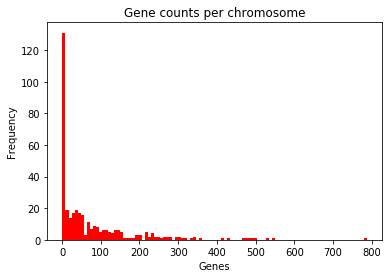

In [15]:
import matplotlib.pyplot as plt

plt.hist(chr_gene_count.values(),bins=100,color="red")
plt.title("Gene counts per chromosome")
plt.ylabel("Frequency")
plt.xlabel("Genes")
?plt.hist

plt.show()

In [16]:
# 4.2) Howmany 'Sequence unavailable' are in the dataset

su_count = 0
for ids in bsm_genes_dict:
    if bsm_genes_dict[ids]["seq"] == "Sequence unavailable":
        su_count +=1
        
print(su_count)

len(bsm_genes_dict.keys())

8122


27502

In [ ]:
# 4.3) Plot an histogram with the gene lengths. 
# Set gene lengths > 100000 bp to 100000
# What is the median gene length for each chromosome?    
gene_lengths = []
gl_per_chr = {}
for ids in bsm_genes_dict:
    # print(int(bsm_genes_dict[ids]["stop"]))
    gl = abs(int(bsm_genes_dict[ids]["stop"]) - int(bsm_genes_dict[ids]["start"])) + 1 
    if gl > 100000:
        gl = 100000
    gene_lengths += [gl]
    bsm_genes_dict[ids]["length"] = gl
    new_id = bsm_genes_dict[ids]["chr"].replace(".","_")
    if new_id in gl_per_chr:
        gl_per_chr[new_id] += [gl]
    else:
        gl_per_chr[new_id] = [gl]            

plt.hist(gene_lengths,bins=100,color="magenta")  
plt.show()
# print(gene_lengths)
# gl_per_chr

import statistics as stats

med_gl_per_chr = {}
for chr_ids in gl_per_chr:
    med_gl_per_chr[chr_ids] = stats.median(gl_per_chr[chr_ids])
# print(med_gl_per_chr)

plt.bar(med_gl_per_chr.keys(),med_gl_per_chr.values())

In [ ]:
# 4.4) Plot a histogram with the gene coding lengths. 
# What is the median coding length for each chromosome?
coding_lengths = []
cl_per_chr = {}
for ids in bsm_genes_dict:
    # print(int(bsm_genes_dict[ids]["stop"]))
    cl = len(bsm_genes_dict[ids]["seq"])
    if cl > 100000:
        cl = 100000
    coding_lengths += [cl]
    bsm_genes_dict[ids]["coding"] = cl
    new_id = bsm_genes_dict[ids]["chr"].replace(".","_")
    if new_id in cl_per_chr:
        cl_per_chr[new_id] += [cl]
    else:
        cl_per_chr[new_id] = [cl]            

plt.hist(coding_lengths,bins=100,color="magenta")  
plt.show()
# print(gene_lengths)
# gl_per_chr

import statistics as stats

med_cl_per_chr = {}
for chr_ids in cl_per_chr:
    med_cl_per_chr[chr_ids] = stats.median(cl_per_chr[chr_ids])
# print(med_gl_per_chr)

plt.bar(med_cl_per_chr.keys(),med_cl_per_chr.values())


In [ ]:
# 4.5) What is the codon usage for each chromosome?
import dna_tools as tools 

tools.translate_dna("AATTGGCTG")

cod_per_chr = {}
for ids in bsm_genes_dict:
    # print(int(bsm_genes_dict[ids]["stop"]))
    if bsm_genes_dict[ids]["seq"] != "Sequence unavailable":
        coduse = tools.get_counts(bsm_genes_dict[ids]["seq"],3)
        new_id = bsm_genes_dict[ids]["chr"].replace(".","_")
        if new_id in cod_per_chr:
            for codid in coduse:
                if codid in cod_per_chr[new_id]:
                    cod_per_chr[new_id][codid] += coduse[codid]
                else:
                    cod_per_chr[new_id][codid] = coduse[codid]
        else:
            cod_per_chr[new_id] = coduse    
            
cod_per_chr            


In [ ]:
# 4.6) Plot a histogram of a the usage of a codon as percentage of total basepairs for each gene.
import dna_tools as tools 

cod_per_chr = {}
for ids in bsm_genes_dict:
    # print(int(bsm_genes_dict[ids]["stop"]))
    if bsm_genes_dict[ids]["seq"] != "Sequence unavailable":
        use_seq = bsm_genes_dict[ids]["seq"]
        coduse = tools.get_counts(use_seq,3)
        new_id = bsm_genes_dict[ids]["chr"].replace(".","_")
        if new_id in cod_per_chr:
            for codid in coduse:
                if codid in cod_per_chr[new_id]:
                    cod_per_chr[new_id][codid] += coduse[codid]/len(use_seq)
                else:
                    cod_per_chr[new_id][codid] = coduse[codid]/len(use_seq)
        else:
            for codid in coduse:
                coduse[codid] = coduse[codid]/len(use_seq)    
                cod_per_chr[new_id] = coduse    
            
cod_per_chr            




In [ ]:
# 4.7) Plot for one chromosome the chromosome start of gene vs the gene length. And a histogram of the start positions
import matplotlib.pyplot as plt
gene_lengths = []
gl_per_chr = {}
start_per_chr = {}
for ids in bsm_genes_dict:
    # print(int(bsm_genes_dict[ids]["stop"]))
    gl = abs(int(bsm_genes_dict[ids]["stop"]) - int(bsm_genes_dict[ids]["start"])) + 1 
    if gl > 100000:
        gl = 100000
    gene_lengths += [gl]
    bsm_genes_dict[ids]["length"] = gl
    new_id = bsm_genes_dict[ids]["chr"].replace(".","_")
    if new_id in gl_per_chr:
        gl_per_chr[new_id] += [gl]
        start_per_chr[new_id] += [int(bsm_genes_dict[ids]["start"])]
    else:
        gl_per_chr[new_id] = [gl]
        start_per_chr[new_id] = [int(bsm_genes_dict[ids]["start"])]

# print(gene_lengths)
# print(start_per_chr)
x = start_per_chr[list(gl_per_chr.keys())[0]]
y = gl_per_chr[list(gl_per_chr.keys())[0]]
plt.scatter(x,y)
plt.show()
plt.hist(x,bins=100)
plt.show()

In [ ]:
# 4.8) Translate the the coding sequences into proteins
import dna_tools as tools 

tools.translate_dna("AATTGGCTG") # check if the translate function works 

for ids in bsm_genes_dict:
    bsm_genes_dict[ids]["prot"] = tools.translate_dna(bsm_genes_dict[ids]["seq"])
    
print(bsm_genes_dict[list(bsm_genes_dict.keys())[7]]) 


In [ ]:
# 4.9) Make a function that reports the peptides and their length after digestion of the protein on a given amino-acid sequence

    # hint: use x to indicate the exact cutting site 
def dig_prot(prot_seq,aa_dig_pattern):
    if "re" not in dir():
        import re as re
    aa_dig_seq = aa_dig_pattern.replace("x","")    
    tmp_prot = prot_seq.replace(aa_dig_seq,aa_dig_pattern)
    fragments = tmp_prot.split("x")
    frag_len = []
    for frag in fragments:
        frag_len += [len(frag)]
    return(fragments,frag_len)
    
## test the function    
use_protein = bsm_genes_dict[list(bsm_genes_dict.keys())[7]]["prot"]
use_dig = "TxSA"
dig_prot(use_protein,use_dig)    

In [ ]:
# 4.10 Make a function that takes the dictionary with genome data and
        # outputs a dictinonary with gene sequences per chromosome, exclude "Sequence unavailable"
        # set a threshold for the minimum genes per chromosome to be taken up in the dictionary, 
                # for example only chromosomes with more than 300 genes
## example {"chr1":["atacgat","gtgatatacatct","ccggaattt",...],"chr2":["atg","ccc","ggt",...],...}

def seq_by_chromosome(input_dict,gene_thr = 300):
    ## get the sequences in a dcitionary, with the chromosome names as keys
    chr_seq_dict = {}
    for ids in input_dict:
        chr_key = input_dict[ids]["chr"]
        tmp_seq = input_dict[ids]["seq"]
        if tmp_seq not in "Sequence unavailable": # check if the sequence in not Sequence unavailable
            if chr_key in chr_seq_dict:
                chr_seq_dict[chr_key] += [tmp_seq]
            else:
                chr_seq_dict[chr_key] = [tmp_seq]
                
    chr_keys = list(chr_seq_dict.keys())
    print(chr_keys)
    new_keys = []
    for chrid in chr_keys:
        if len(chr_seq_dict[chrid]) > gene_thr:
            new_keys += [chrid]
            print(new_keys)
    
    chr_seq_dict2 = {}         
    for chrid in new_keys:
        chr_seq_dict2[chrid] = chr_seq_dict[chrid]
    
    return(chr_seq_dict2)
## test function
ok = seq_by_chromosome(bsm_genes_dict,200)
print(ok[list(ok.keys())[0]])                     
                     

In [ ]:
# 4.11 make a function that shows the distributio of GC contents of multiple groups of genes. 
    # For example the genes per chromosome
    # hint you can use plt.violinplot
    
def violin_GC(input_dict):
    ## check if the matplotlib.pyplot is loaded
    if "plt" not in dir():
        import matplotlib.pyplot as plt
    
    if  "ax" not in dir():
        import matplotlib.axes as ax
    
    ## make function to count GC content for each gene
    def get_cg_content (gene_seq):
        at = gene_seq.count("A") + gene_seq.count("T")
        cg = gene_seq.count("C") + gene_seq.count("G")
        if ((at+cg) > 0):
            gc_content = cg/(at+cg)
        else:
            gc_content = 0
        return gc_content
    ## get chromosome labels so they can be used later and stay in the same order
    chr_labels = list(input_dict.keys())
    ## make list to collect the lists of gc contents
    gc_list = []
    for chrid in chr_labels:
        tmp_gc = []
        for seq in input_dict[chrid]: 
            tmp_gc += [get_cg_content(seq)]
        gc_list += [tmp_gc]    
    
    plt.violinplot(gc_list,widths=0.9) 
    plt.boxplot(gc_list,widths=0.2)
    plt.xticks(range(1,len(chr_labels)+1), chr_labels,rotation =45)
    plt.ylabel("%GC")
    plt.xlabel("Chromosome")
    plt.show()
    
violin_GC(ok)   
    
len(ok.keys())   
    
    

In [ ]:
# 4.12 Make a function that compares the GC content of two groups of genes in a figure

def compare_GC(group1,group2):
    if "plt" not in dir():
        import matplotlib.pyplot as plt
    gc_content1 = []
    gc_content2 = []
    for gene in group1:
        at = gene.count("A") + gene.count("T")
        gc = gene.count("C") + gene.count("G")
        if ((at+gc) > 0):
            gc_content1 += [gc/(at+gc)]
        else:
            gc_content2 += [0]
    for gene in group1:
        at = gene.count("A") + gene.count("T")
        gc = gene.count("C") + gene.count("G")
        if ((at+gc) > 0):
            gc_content2 += [gc/(at+gc)]
        else:
            gc_content2 += [0]
    
    plt.hist([gc_content1,gc_content2],bins=100) 
    plt.show()
    plt.violinplot([gc_content1,gc_content2]) 
    
## test function    

## make two groups of genes baseed on length
grp1 = []
grp2 = []
for ids in bsm_genes_dict:
    gseq = bsm_genes_dict[ids]["seq"]
    if len(gseq) > 60 & len(gseq) < 601:
        grp1 += [gseq]
    elif len(gseq) > 600:
        grp2 += [gseq]
        
compare_GC(grp1,grp2)            

In [ ]:
# 4.13) Can you make up your own question and visualisation for the results?



# 5 Can you make a function to

5.1) load the data from a genome file with the same structure into a dictionary

5.2) test the function using the Dolphin_genes_mart_export.txt file

5.3) A function that extracts genome features such as, no. of genes, average gene length, coding length,
 make figures of the gene length distribution, coding length distrbution, gc content distribution,
 coding length vs gene length, gc vs coding length

5.4) test the function using the Dolphin_genes_mart_export.txt file

In [ ]:
# 5.1) load the data from a genome file with the same structure into a dictionary
def get_genome_data(use_file):
    
    genome_file = open(use_file,"r")

    genome_genes = {}
    for line in genome_file:
        line = line.rstrip()
        if ( len(line) > 0):
            data = line.split("|")
            if (data[0][0] == ">"):
                gene_info = {"start":int(data[1]),"stop":int(data[2]),"contig":data[3],"sequence":""}
                use_key = data[0]
                genome_genes[use_key] = gene_info
            else:
                genome_genes[use_key]["sequence"] += data[0]

    genome_file.close()
    return genome_genes


In [ ]:
# 5.2) test the function using the Dolphin_genes_mart_export.txt file
dol_genes = get_genome_data(use_file = "Dolphin_genes_mart_export.txt")
print(dol_genes[list(dol_genes.keys())[2]])

In [ ]:
# 5.3) A function that extracts genome features such as, no. of genes, average gene length, coding length,
# make figures of the gene length distribution, coding length distrbution, gc content distribution,
# coding length vs gene length, gc vs coding length

def get_cg_content (gene_seq):
    at = gene_seq.count("A") + gene_seq.count("T")
    cg = gene_seq.count("C") + gene_seq.count("G")
    if ((at+cg) > 0):
        gc_content = cg/(at+cg)
    else:
        gc_content = 0
    return gc_content


def get_start_stop_codon (use_genome):
    import matplotlib.pyplot as plt
    start_codon = {}
    stop_codon = {}
    for seq_key in use_genome:
        tmp_seq = use_genome[seq_key]["sequence"]
        tmp_start = tmp_seq[0:3]
        if(tmp_start not in start_codon.keys()):
            start_codon[tmp_start] = 1
        else:
            start_codon[tmp_start] += 1

        tmp_stop = tmp_seq[(len(tmp_seq)-3):(len(tmp_seq)+1)]
        if(tmp_stop not in stop_codon.keys()):
            stop_codon[tmp_stop] = 1
        else:
            stop_codon[tmp_stop] += 1

    plt.subplots(ncols=2,dpi=150)
    plt.bar(start_codon.keys(),start_codon.values())
    plt.bar(stop_codon.keys(),stop_codon.values())
    plt.xticks(rotation="vertical",fontsize=6) ;
    plt.show()
    

def show_genome_features(use_genome,
                        show_no_of_genes = True,
                        show_average_gene_length = True,
                        show_average_coding_length = True,
                        plot_gene_length_distri = True,
                        plot_coding_length_distri = True,
                        plot_coding_vs_gene_length = True,
                        plot_gc_content_distri = True,
                        plot_gc_vs_coding_len = True):
    ### import modules
    import matplotlib.pyplot as plt
    
    ## extract features
        ### gene lengths
    gene_len = []
    for seq_key in use_genome:
        tmp = [use_genome[seq_key]["stop"]-use_genome[seq_key]["start"]]
        gene_len += tmp
        ### coding lengths
    coding_len = []
    for seq_key in use_genome:
        coding_len += [len(use_genome[seq_key]["sequence"])]    
        ### gc content
    gc_per_gene = []    
    for seq_key in use_genome:
        gc_per_gene += [get_cg_content(use_genome[seq_key]["sequence"])]
    
    
    ### show no of genes
    if(show_no_of_genes):
        print("This genome consists of " + str(len(use_genome))  + " genes")
    
    ### show average gene length
    if(show_average_gene_length):
        print("The average gene length is " + str(sum(gene_len)/len(gene_len)) + " basepairs")   
        
    ### show average coding length    
    if(show_average_coding_length):
        print("The average coding region is " + str(sum(coding_len)/len(coding_len)) + " basepairs")   
    
    ### plot gene length distribution
    if(plot_gene_length_distri):
        plt.hist(gene_len,bins=1000)
        plt.title("Gene Length")
        plt.xlim(0,20000)
        plt.show()
     
    ### plot coding length distribution
    if(plot_coding_length_distri):
        plt.hist(coding_len,bins=1000)
        plt.title("Coding Length")
        plt.xlim(0,20000)        
        plt.show()
        
    ### plot coding vs gene length
    if(plot_coding_vs_gene_length):
        plt.plot(gene_len,coding_len,linestyle="",marker=".")
        plt.xlim(0,20000)
        plt.ylim(0,20000)
        plt.xlabel("Gene Length")
        plt.ylabel("Coding Length")
        plt.show()
    
    ### plot gc_content_distri
    if(plot_gc_content_distri):
        plt.hist(gc_per_gene,bins=200)
        plt.xlim(0.1,0.9)
        plt.ylim(0,1000)
        plt.title("GC content")
        plt.show()
     
    ### plot gc vs coding length
    if(plot_gc_vs_coding_len):
        plt.plot(coding_len,gc_per_gene,linestyle="",marker=".")
        plt.xlabel("Gene Length")
        plt.ylabel("GC")
        plt.xlim(0,20000)
        plt.show()
        
    get_start_stop_codon(use_genome)
      


In [ ]:
# 5.4 Test the function with  Dolphin_genes_mart_export.txt file
dol_genes = get_genome_data(use_file = "Dolphin_genes_mart_export.txt")
show_genome_features(dol_genes)